In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import svm

In [2]:
columns = ['label','type','song','score','time','tag4','tag5','author1','author2','author3']
df = pd.read_csv('df.csv')
df.head()

,score,tag4,tag5,type,time,label,author1,author2,author3,song
0,7.3,数字(Digital),流行,1.0,2020,1.0,蔡徐坤,NaN,NaN,情人
1,8.1,CD,流行,2.0,2004,1.0,周杰伦,NaN,NaN,七里香
2,7.8,CD,流行,2.0,2020,1.0,田馥甄,NaN,NaN,无人知晓
3,8.6,数字(Digital),流行,1.0,2020,2.0,蔡健雅 Tanya Chua,王源 Roy Wang,NaN,在哪里都很好
4,8.4,数字(Digital),流行,2.0,2020,1.0,鹿晗 Luhan,NaN,NaN,π-volume.4


In [3]:
df = df[columns]
df.head()

,label,type,song,score,time,tag4,tag5,author1,author2,author3
0,1.0,1.0,情人,7.3,2020,数字(Digital),流行,蔡徐坤,NaN,NaN
1,1.0,2.0,七里香,8.1,2004,CD,流行,周杰伦,NaN,NaN
2,1.0,2.0,无人知晓,7.8,2020,CD,流行,田馥甄,NaN,NaN
3,2.0,1.0,在哪里都很好,8.6,2020,数字(Digital),流行,蔡健雅 Tanya Chua,王源 Roy Wang,NaN
4,1.0,2.0,π-volume.4,8.4,2020,数字(Digital),流行,鹿晗 Luhan,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    2285 non-null   float64
 1   type     2285 non-null   float64
 2   song     2285 non-null   object 
 3   score    2285 non-null   float64
 4   time     2285 non-null   int64  
 5   tag4     2285 non-null   object 
 6   tag5     2285 non-null   object 
 7   author1  2285 non-null   object 
 8   author2  265 non-null    object 
 9   author3  59 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 178.6+ KB


In [5]:
X1 = ['tag4','time']
y1 = df['label']

In [6]:
df.drop_duplicates(['tag4','tag5'])

,label,type,song,score,time,tag4,tag5,author1,author2,author3
0,1.0,1.0,情人,7.3,2020,数字(Digital),流行,蔡徐坤,NaN,NaN
1,1.0,2.0,七里香,8.1,2004,CD,流行,周杰伦,NaN,NaN
7,2.0,1.0,平凡之路,8.9,2014,数字(Digital),原声,朴树,NaN,NaN
13,2.0,1.0,夜空中最亮的星,9.4,2011,数字(Digital),摇滚,逃跑计划,NaN,NaN
20,2.0,2.0,七里香,9.3,2004,CD+DVD,流行,周杰倫,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2210,2.0,2.0,Solid State Survivor,9.1,1979,Original recording remastered,Audio CD,Yellow Magic Orchestra,NaN,NaN
2222,2.0,2.0,天空の城ラピュタ ハイテックシリーズ,8.6,2004,Soundtrack,Audio CD,Japanimation (Joe Hisaishi),NaN,NaN
2263,2.0,1.0,いつも何度でも [Promotional Use Only],9.3,2001,SingleCD,流行,木村弓 Kimura Yumi,NaN,NaN
2265,2.0,2.0,Soul of the Tango: Music of Astor Piazzolla,9.3,1997,CD Extra,拉丁,马友友,NaN,NaN


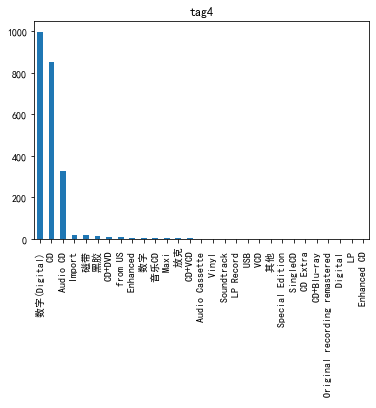

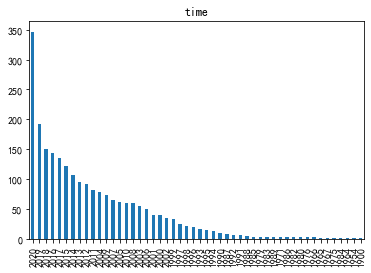

In [7]:
for v in X1:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(v)
    plt.show()

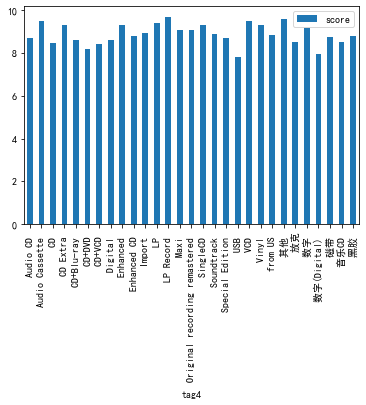

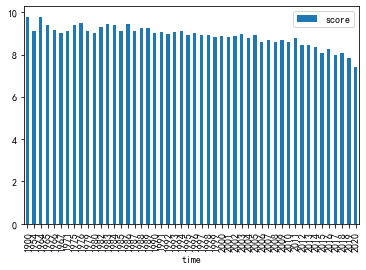

In [8]:
for v in X1:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['score'],kind = 'bar')
    plt.show()

In [9]:
df['tag4'] = LabelEncoder().fit_transform(df['tag4'])
df['tag5'] = LabelEncoder().fit_transform(df['tag5'])
df.head()

,label,type,song,score,time,tag4,tag5,author1,author2,author3
2284,2.0,2.0,c大调小星星变奏曲,9.8,1900,2,10,莫扎特,NaN,NaN
1605,2.0,2.0,My Funny Valentine,9.1,1954,2,17,Chet Baker,NaN,NaN
997,2.0,1.0,The Sound of Silence,9.8,1964,28,15,Simon & Garfunkel,NaN,NaN
1379,2.0,2.0,Rubber Soul,9.4,1965,0,12,The Beatles,NaN,NaN
1551,2.0,2.0,Pet Sounds,9.0,1966,2,12,The Beach Boys,NaN,NaN


In [10]:
df.drop_duplicates(['author1','author2','author3'])

,label,type,song,score,time,tag4,tag5,author1,author2,author3
2284,2.0,2.0,c大调小星星变奏曲,9.8,1900,2,10,莫扎特,NaN,NaN
1605,2.0,2.0,My Funny Valentine,9.1,1954,2,17,Chet Baker,NaN,NaN
997,2.0,1.0,The Sound of Silence,9.8,1964,28,15,Simon & Garfunkel,NaN,NaN
1379,2.0,2.0,Rubber Soul,9.4,1965,0,12,The Beatles,NaN,NaN
1551,2.0,2.0,Pet Sounds,9.0,1966,2,12,The Beach Boys,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1222,0.0,1.0,Laugh Now Cry Later,5.9,2020,25,19,Drake,Lil Durk,NaN
97,1.0,2.0,给你们 (限量预购版),8.0,2020,2,16,万芳 Fang.Wan,NaN,NaN
1002,0.0,2.0,Tickets To My Downfall,6.2,2020,2,12,Machine Gun Kelly,NaN,NaN
1084,1.0,1.0,Love You More,7.5,2020,25,18,Steve Aoki,张艺兴,will.i.am


In [11]:
df = pd.get_dummies(df,columns=['author1','author2','author3'],dummy_na=False)

In [12]:
df.head()

,label,type,song,score,time,tag4,tag5,author1_(G)I-DLE,author1_2Pac,author1_4 Non Blondes,...,author3_易烊千玺,author3_林海,author3_柯以敏,author3_王华,author3_王子异,author3_萧亚轩,author3_薛明媛,author3_许佑华,author3_陈燮阳,author3_이루마
2284,2.0,2.0,c大调小星星变奏曲,9.8,1900,2,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1605,2.0,2.0,My Funny Valentine,9.1,1954,2,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,2.0,1.0,The Sound of Silence,9.8,1964,28,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1379,2.0,2.0,Rubber Soul,9.4,1965,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1551,2.0,2.0,Pet Sounds,9.0,1966,2,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
single = pd.DataFrame()
single = df[df['type'] == 1]
single.head()

,label,type,song,score,time,tag4,tag5,author1_(G)I-DLE,author1_2Pac,author1_4 Non Blondes,...,author3_易烊千玺,author3_林海,author3_柯以敏,author3_王华,author3_王子异,author3_萧亚轩,author3_薛明媛,author3_许佑华,author3_陈燮阳,author3_이루마
997,2.0,1.0,The Sound of Silence,9.8,1964,28,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1571,2.0,1.0,Hotel California,9.7,1976,28,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,2.0,1.0,Hey Jude,9.7,1988,12,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,2.0,1.0,We Didn't Start The Fire,9.5,1989,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,2.0,1.0,Don't Cry,9.5,1991,1,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
album = pd.DataFrame()
album = df[df['type'] == 2]
album.head()

,label,type,song,score,time,tag4,tag5,author1_(G)I-DLE,author1_2Pac,author1_4 Non Blondes,...,author3_易烊千玺,author3_林海,author3_柯以敏,author3_王华,author3_王子异,author3_萧亚轩,author3_薛明媛,author3_许佑华,author3_陈燮阳,author3_이루마
2284,2.0,2.0,c大调小星星变奏曲,9.8,1900,2,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1605,2.0,2.0,My Funny Valentine,9.1,1954,2,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1379,2.0,2.0,Rubber Soul,9.4,1965,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1551,2.0,2.0,Pet Sounds,9.0,1966,2,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1262,2.0,2.0,Sounds Of Silence,9.3,1966,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
Xs = single.iloc[:,3:]
ys = single['label']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3,random_state = 42)
Xa = album.iloc[:,3:]
ya = album['label']
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.3,random_state = 42)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score

### Single KMeans

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
cluster=model.fit_predict(Xs)
print(cluster)
print(cluster.shape)
print(ys.shape)
print(accuracy_score(ys,cluster))

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

### Album KMeans

In [18]:
model = KMeans(n_clusters=3)
cluster=model.fit_predict(Xa)
print(cluster)
print(cluster.shape)
print(ya.shape)
print(accuracy_score(ya,cluster))

[0 0 0 ... 2 2 1]
(1333,)
(1333,)
0.2738184546136534


### Single LinearRegression

In [19]:
regr = LinearRegression()
regr.fit(Xs_train,ys_train)
regr.score(Xs_train,ys_train)

0.9407976977965158

In [20]:
y_pred = model.predict(Xs_test)
print(accuracy_score(ys_test,y_pred))

0.5524475524475524


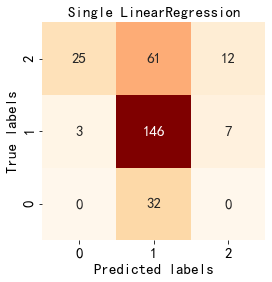

In [21]:
con_mat = confusion_matrix(ys_test,y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat, annot=True, cmap='OrRd',cbar=False, annot_kws={'size':15},fmt='g')

plt.ylim(0, 3)
plt.xlabel('Predicted labels',fontsize=15)
plt.ylabel('True labels',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Single LinearRegression',fontsize=15)
plt.show()

In [22]:
p = precision_score(ys_test,y_pred, average='macro')
r = recall_score(ys_test,y_pred, average='macro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ys_test,y_pred, average='macro')
print(a)

Precision:0.4141525361520957;recall:0.3527821384964242
0.31478957048577305


In [23]:
p = precision_score(ys_test,y_pred, average='micro')
r = recall_score(ys_test,y_pred, average='micro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ys_test,y_pred, average='micro')
print(a)

Precision:0.5524475524475524;recall:0.5524475524475524
0.5524475524475524


### Album LinearRegression

In [24]:
regr.fit(Xa_train,ya_train)
regr.score(Xa_train,ya_train)

0.9369105054198269

In [25]:
y_pred = model.predict(Xa_test)
print(accuracy_score(ya_test,y_pred))

0.2625


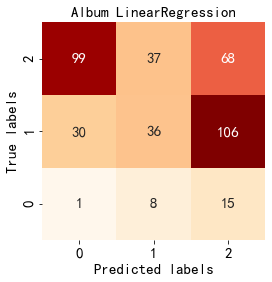

In [26]:
con_mat = confusion_matrix(ya_test,y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat, annot=True, cmap='OrRd',cbar=False, annot_kws={'size':15},fmt='g')

plt.ylim(0, 3)
plt.xlabel('Predicted labels',fontsize=15)
plt.ylabel('True labels',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Album LinearRegression',fontsize=15)
plt.show()

In [27]:
p = precision_score(ya_test,y_pred, average='macro')
r = recall_score(ya_test,y_pred, average='macro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ya_test,y_pred, average='macro')
print(a)

Precision:0.2706417039750373;recall:0.1947674418604651
0.21454265762264435


In [28]:
p = precision_score(ya_test,y_pred, average='micro')
r = recall_score(ya_test,y_pred, average='micro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ya_test,y_pred, average='micro')
print(a)

Precision:0.2625;recall:0.2625
0.2625


### Single LR

In [29]:
lr = LogisticRegression()
lr.fit(Xs_train,ys_train)
print(confusion_matrix(ys_test,lr.predict(Xs_test)))
print(accuracy_score(ys_test,lr.predict(Xs_test)))

[[ 23   9   0]
 [ 16 137   3]
 [  0   1  97]]
0.8986013986013986


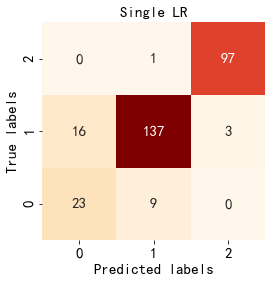

In [30]:
con_mat = confusion_matrix(ys_test,lr.predict(Xs_test))
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat, annot=True, cmap='OrRd',cbar=False, annot_kws={'size':15},fmt='g')

plt.ylim(0, 3)
plt.xlabel('Predicted labels',fontsize=15)
plt.ylabel('True labels',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Single LR',fontsize=15)
plt.show()

In [31]:
p = precision_score(ys_test,lr.predict(Xs_test), average='macro')
r = recall_score(ys_test,lr.predict(Xs_test), average='macro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ys_test,lr.predict(Xs_test), average='macro')
print(a)

Precision:0.830572126286412;recall:0.8622503488574917
0.843991910928182


In [32]:
p = precision_score(ys_test,lr.predict(Xs_test), average='micro')
r = recall_score(ys_test,lr.predict(Xs_test), average='micro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ys_test,lr.predict(Xs_test), average='micro')
print(a)

Precision:0.8986013986013986;recall:0.8986013986013986
0.8986013986013986


### Album LR

In [33]:
lr = LogisticRegression()
lr.fit(Xa_train,ya_train)
print(confusion_matrix(ya_test,lr.predict(Xa_test)))
print(accuracy_score(ya_test,lr.predict(Xa_test)))

[[  0  24   0]
 [  0 170   2]
 [  0   0 204]]
0.935


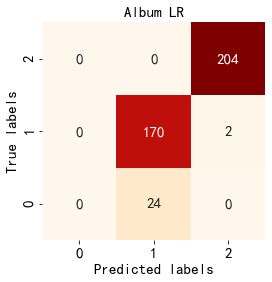

In [34]:
con_mat = confusion_matrix(ya_test,lr.predict(Xa_test))
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat, annot=True, cmap='OrRd',cbar=False, annot_kws={'size':15},fmt='g')

plt.ylim(0, 3)
plt.xlabel('Predicted labels',fontsize=15)
plt.ylabel('True labels',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Album LR',fontsize=15)
plt.show()

In [35]:
p = precision_score(ya_test,lr.predict(Xa_test), average='macro')
r = recall_score(ya_test,lr.predict(Xa_test), average='macro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ya_test,lr.predict(Xa_test), average='macro')
print(a)

Precision:0.6221933073099123;recall:0.6627906976744186
0.6413612332844639


In [36]:
p = precision_score(ya_test,lr.predict(Xa_test), average='micro')
r = recall_score(ya_test,lr.predict(Xa_test), average='micro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ya_test,lr.predict(Xa_test), average='micro')
print(a)

Precision:0.935;recall:0.935
0.935


### Single RF

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(Xs_train,ys_train)
y_pred = model.predict(Xs_test)
print(confusion_matrix(ys_test,y_pred))
print(accuracy_score(ys_test,y_pred))

[[ 29   3   0]
 [  1 155   0]
 [  0   0  98]]
0.986013986013986


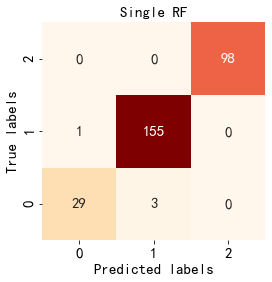

In [38]:
con_mat = confusion_matrix(ys_test,y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat, annot=True, cmap='OrRd',cbar=False, annot_kws={'size':15},fmt='g')

plt.ylim(0, 3)
plt.xlabel('Predicted labels',fontsize=15)
plt.ylabel('True labels',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Single RF',fontsize=15)
plt.show()

In [39]:
p = precision_score(ys_test,y_pred, average='macro')
r = recall_score(ys_test,y_pred, average='macro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ys_test,y_pred, average='macro')
print(a)

Precision:0.9825597749648383;recall:0.9666132478632479
0.9742483391548524


In [40]:
p = precision_score(ys_test,y_pred, average='micro')
r = recall_score(ys_test,y_pred, average='micro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ys_test,y_pred, average='micro')
print(a)

Precision:0.986013986013986;recall:0.986013986013986
0.986013986013986


### Album RF

In [41]:
model = RandomForestClassifier()
model.fit(Xa_train,ya_train)
y_pred = model.predict(Xa_test)
print(confusion_matrix(ya_test,y_pred))
print(accuracy_score(ya_test,y_pred))

[[ 22   2   0]
 [  0 172   0]
 [  0   0 204]]
0.995


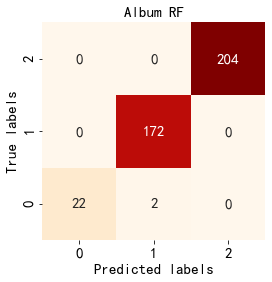

In [42]:
con_mat = confusion_matrix(ya_test,y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(con_mat, annot=True, cmap='OrRd',cbar=False, annot_kws={'size':15},fmt='g')

plt.ylim(0, 3)
plt.xlabel('Predicted labels',fontsize=15)
plt.ylabel('True labels',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Album RF',fontsize=15)
plt.show()

In [43]:
p = precision_score(ya_test,y_pred, average='macro')
r = recall_score(ya_test,y_pred, average='macro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ya_test,y_pred, average='macro')
print(a)

Precision:0.9961685823754789;recall:0.9722222222222222
0.9835804641032085


In [44]:
p = precision_score(ya_test,y_pred, average='micro')
r = recall_score(ya_test,y_pred, average='micro')
print('Precision:{};recall:{}'.format(p,r))
a = f1_score(ya_test,y_pred, average='micro')
print(a)

Precision:0.995;recall:0.995
0.995


<AxesSubplot:ylabel='type'>

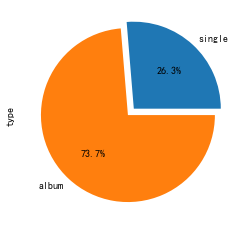

In [45]:
df.groupby('type')['type'].agg(lambda x:sum(x)).plot(kind='pie',labels = ['single','album'],autopct='%1.1f%%',explode = (0.1,0))

In [49]:
df.loc[df['score'] > 8.5, 'label'] = 3
df.loc[df['score'] < 8.5, 'label'] = 2
df.loc[df['score'] == 8.5, 'label'] = 2
df.loc[df['score'] == 7, 'label'] = 1
df.loc[df['score'] < 7, 'label'] = 1

<AxesSubplot:ylabel='label'>

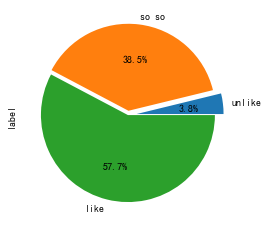

In [50]:
df.groupby('label')['label'].agg(lambda x:sum(x)).plot(kind='pie',labels = ['unlike','so so','like'],autopct='%1.1f%%',explode = (0.1,0.05,0))

In [51]:
unlike = df[df['label'] == 1]
soso = df[df['label'] == 2]
like = df[df['label'] == 3]
print(len(like),len(soso),len(unlike))

1040 1039 206
